In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import re
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

In [2]:
#Stroe CSV into DataFrame
datasci_file="/Users/macowner/Project_3/data-scientist-job-market-in-the-us/alldata.csv"
datasci_df = pd.read_csv(datasci_file)
datasci_df.head()

In [3]:
total_no_company= datasci_df['company'].nunique()
print('Total number of firms with data science job vacancies',total_no_company)

Top 10 firms with most vacancies                                      company  position
122                               Amazon.com       358
230                           Ball Aerospace       187
1270                               Microsoft       137
866                                   Google       134
1328                      NYU Langone Health        77
798   Fred Hutchinson Cancer Research Center        70
1095                                    KPMG        66
1136                                  Lab126        50
748                                 Facebook        49
324                          Broad Institute        49
2101                       Walmart eCommerce        45
1248                      McKinsey & Company        41
1876                   Takeda Pharmaceutical        39
2040                University of Washington        39
928                                  Harnham        39
1421                                Oath Inc        34
1512        Pharmacyclics, an Ab

Text(0, 0.5, '# OF JOBS')

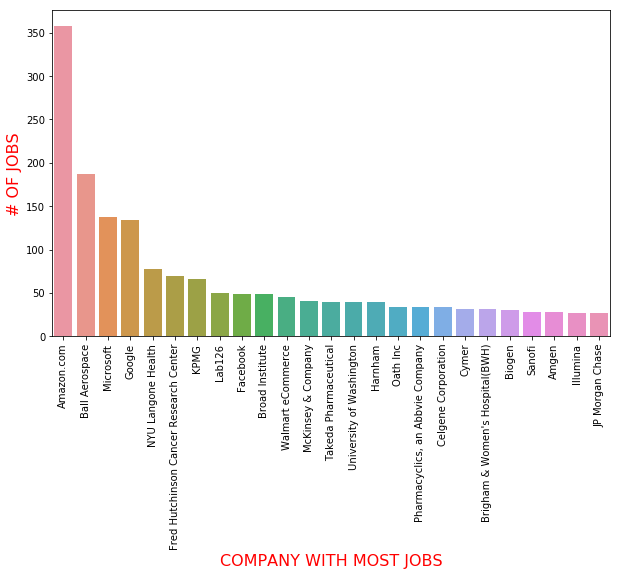

In [4]:
#finding highest number of vacancy in a company
most_vacancy = datasci_df.groupby(['company'])['position'].count()
most_vacancy = most_vacancy.reset_index(name='position')
most_vacancy = most_vacancy.sort_values(['position'],ascending=False)
pareto_df = most_vacancy
most_vacancy=most_vacancy.head(25)
print('Top 10 firms with most vacancies',most_vacancy)

# Plot graph for top most vacancy
fig, ax = plt.subplots(figsize = (10,6))
ax = seaborn.barplot(x = "company", y = "position", data= most_vacancy)    
ax.set_xticklabels(most_vacancy['company'],rotation=90)  
ax.set_xlabel('COMPANY WITH MOST JOBS',fontsize=16, color='red')
ax.set_ylabel('# OF JOBS',fontsize=16,color='red') 

Toatl number of roles across all the firms 5242
Top 15 most wanted roles across firms                                  position  company
1026                       Data Scientist      351
3833                Senior Data Scientist       96
3115                     Research Analyst       64
928                         Data Engineer       60
2152            Machine Learning Engineer       56
2071                  Lead Data Scientist       31
3276                   Research Scientist       30
4685                   Sr. Data Scientist       28
2660             Principal Data Scientist       24
879                          Data Analyst       22
4443                    Software Engineer       22
2977                 Quantitative Analyst       21
3486                            Scientist       17
2837                      Product Manager       17
495              Bioinformatics Scientist       16
2300              Market Research Analyst       15
4245             Senior Software Engineer      

Text(0, 0.5, 'NO OF ROLES ACROSS INDUSTRY')

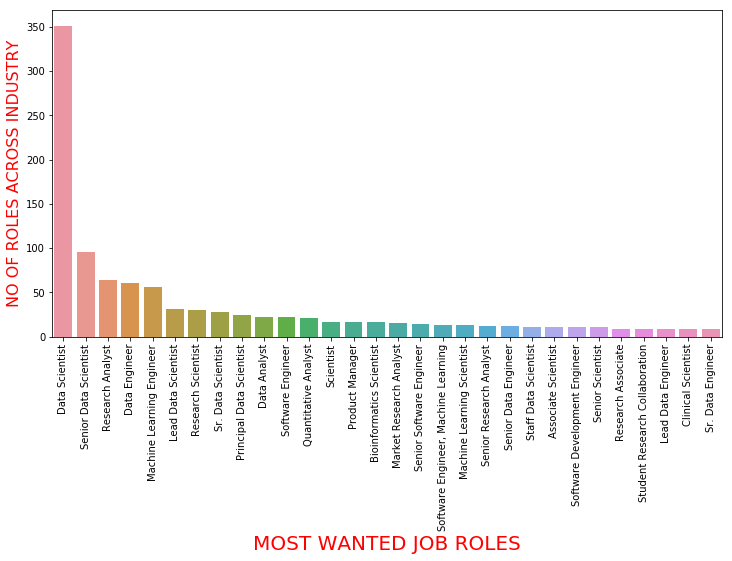

In [5]:
# Finding total number of unique roles in data science domain from the given dataset
total_no_roles= datasci_df['position'].nunique()
print('Toatl number of roles across all the firms',total_no_roles)

# most offered roles across all the firms
most_offd_roles=datasci_df.groupby(['position'])['company'].count()   
most_offd_roles=most_offd_roles.reset_index(name='company')
most_offd_roles=most_offd_roles.sort_values(['company'],ascending=False)
most_offd_roles=most_offd_roles.head(30)
print('Top 15 most wanted roles across firms',most_offd_roles)

# Plot graph for top most offered roles
fig,ax=plt.subplots(figsize=(12,6))
ax=seaborn.barplot(x="position", y="company", data=most_offd_roles)    
ax.set_xticklabels(most_offd_roles['position'],rotation=90)
ax.set_xlabel('MOST WANTED JOB ROLES',fontsize=20,color='red')
ax.set_ylabel('NO OF ROLES ACROSS INDUSTRY',fontsize=16,color='red')#

In [9]:
#MACHINE LEARNING
#there are so many job profiles in teh given dataset so lets Categories them into 5; Data Scientist, Machine Learning Engineer, Data Analyst, Data Science Manager and Others

# Creating only 5 datascience roles among all
data=datasci_df.copy()
data.dropna(subset=['position'], how='all', inplace = True)
data['position']=[x.upper() for x in data['position']]
data['description']=[x.upper() for x in data['description']]

data.loc[data.position.str.contains("SCIENTIST"), 'position'] = 'Data Scientist'

data.loc[data.position.str.contains('ENGINEER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('PRINCIPAL STATISTICAL PROGRAMMER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('PROGRAMMER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('DEVELOPER'),'position']='Machine Learning Engineer'

data.loc[data.position.str.contains('ANALYST'), 'position'] = 'Data Analyst'
data.loc[data.position.str.contains('STATISTICIAN'), 'position'] = 'Data Analyst'

data.loc[data.position.str.contains('MANAGER'),'position']='Data Science Manager'
data.loc[data.position.str.contains('CONSULTANT'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DATA SCIENCE'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DIRECTOR'),'position']='Data Science Manager'
data.position=data[(data.position == 'Data Scientist') | (data.position == 'Data Analyst') | (data.position == 'Machine Learning Engineer') | (data.position == 'Data Science Manager')]
data.position=['Others' if x is np.nan else x for x in data.position]

position=data.groupby(['position'])['company'].count()   
position=position.reset_index(name='company')
position=position.sort_values(['company'],ascending=False)

print('Here is  the count of each new roles we created :', '\n\n', position)


Here is  the count of each new roles we created : 

                     position  company
2             Data Scientist     2645
3  Machine Learning Engineer     1384
4                     Others     1295
0               Data Analyst      848
1       Data Science Manager      781


In [14]:
# Next Part in ML Algorithm is Data Cleansing
X=data.description
Y=data.position

X=[re.sub(r"[^a-zA-Z0-9]+", ' ', k) for k in X]
X=[re.sub("[0-9]+",' ',k) for k in X]

#applying stemmer
ps =PorterStemmer()
X=[ps.stem(k) for k in X]

#Note: I have not removed stop words because there are important key words mentioned in job description which are of length 2, I feel they have weightage while classifing
tfidf=TfidfVectorizer()
label_enc=LabelEncoder()

X=tfidf.fit_transform(X)
Y=label_enc.fit_transform(Y)

x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.3)

In [15]:
# first algorithm SVM
#SVM classification
svm=SVC(kernel='rbf')
svm.fit(x_train,y_train)

svm_y=svm.predict(x_test)

print('Accuracy of SVM :', accuracy_score(y_test,svm_y))
print ('Confusion Matrix of SVM : ', '\n\n', confusion_matrix(y_test,svm_y))

#crossfold Validation of 7 folds for SVM
cross_val_SVM=sklearn.model_selection.cross_validate(svm, x_train, y=y_train,cv=7)

print ('SVM Train fit score is : ', '\n\n', cross_val_SVM ['train_score'])
print ('SVM TEST score is : ', '\n\n', cross_val_SVM ['test_score'])

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM : 0.38063279002876316
Confusion Matrix of SVM :  

 [[  0   0 254   0   0]
 [  0   0 234   0   0]
 [  0   0 794   0   0]
 [  0   0 415   0   0]
 [  0   0 389   0   0]]


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KeyError: 'train_score'

In [16]:
#Naive Bayes classification
NB=MultinomialNB()
NB.fit(x_train,y_train)
NB_y=NB.predict(x_test)

print('Accuracy of NB :', accuracy_score(y_test,NB_y))
print ('Confusion Matrix of NB : ', '\n\n', confusion_matrix(y_test,NB_y))

#crossfold Validation of 7 folds for NB
cross_val_NB=sklearn.model_selection.cross_validate(NB, x_train, y=y_train,cv=7)

print ('NB Train fit score is : ', '\n\n', cross_val_NB ['train_score'])
print ('NB TEST score is : ', '\n\n', cross_val_NB ['test_score'])

Accuracy of NB : 0.40651965484180247
Confusion Matrix of NB :  

 [[  0   0 253   1   0]
 [  0   0 233   1   0]
 [  0   0 794   0   0]
 [  0   0 371  44   0]
 [  0   0 361  18  10]]


KeyError: 'train_score'